# Kernel PCA

In [1]:
from IPython.display import Image

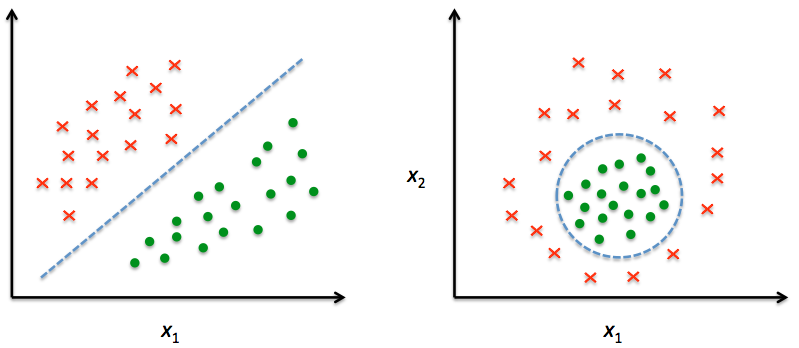

In [2]:
Image('kpca-1.png')

1. It is used for non-linearly seperable classes.
2. PCA,LDA are not best choice then kernel-PCA is used.
3. It relates to kernel SVM concepts.
4. Using kernel-PCA we can transform data that is not linearly seperable on to a new lower-dimensional subspace that is suitable for linear classifiers.

## Kernel functions & Kernel trick:

We can tackle non-linear problems by projecting them onto a new feature space of higher dimensionality where the classes become linearly seperable.

$$\phi: \mathbb{R}^d \rightarrow \mathbb{R}^k \ \ (k>>d)$$

$\phi$ - non-linear mapping function.

Ex: 2 features $x_1$ & $x_2$  $$x = [x_1,x_2]^T$$

$$\downarrow \phi $$

$$z = [x_1^2,\sqrt{2x_1x_2},x_2^2]^T$$

In kernel-PCA we perform a non-linear mapping that transforms the data onto a higher dimensional space and use **Standard PCA** in this higher-dimensional space to project the data back on to a lower-dimensional space where samples can be linearly seperable.

But the preceeding method is computationally expensive because we need to find **eigen pairs** and then project back using the transformation matrix (dot product) so to overcome this problem we use **kernel** trick.

Using Kernel trick we directly obtain samples projected to the higher dimensions.
$$ $$
$$k(x^{(i)},x^{(j)}) = \phi (x^{(i)})^T \phi (x^{(j)})$$

#### Kernel function:

A function that calculates a dot product between two vectors - a measure of similarity.

#### Polynomial kernel:

$$k(x^{(i)},x^{(j)}) = ((x^{(i)})^T x^{(j)}+\theta)^p$$

$p$ - power or degree,  $\theta$ - threshold

#### Hyperbolic tangent (sigmoid) kernel:

$$k(x^{(i)},x^{(j)}) = \tanh (\eta (x^{(i)})^T x^{(j)}+\theta)$$

#### Radial basis function:

$$k(x^{(i)},x^{(j)}) = \exp \left ( -\frac{\| x^{(i)} - x^{(j)}  \|^2}{2\sigma^2} \right ) $$

$$k(x^{(i)},x^{(j)}) = \exp \left ( -\gamma \| x^{(i)} - x^{(j)}  \|^2 \right ) $$

### Kernel PCA Steps:

1. Compute kernel function.
$$ $$
   Ex: $$k(x^{(i)},x^{(j)}) = \exp \left ( -\gamma \| x^{(i)} - x^{(j)}  \|^2 \right ) $$
2. Create kernel matrix $K$
    <img src='kpca-2.png'/>
    $K$ is of dimension $n \times n$ where $n$ - no.of.samples
    $$$$
3. Calculate kernel center matrix
$$ $$
$$K' = K- 1_nK - K1_n + 1_n K 1_n$$
$$$$
We do this because it simplifies standardizing $ \phi(x^{(i)}) \ \& \  \phi(x^{(j)})$ explicitly.
$$$$
Same as computing kernel matrix by standardizing $ \phi(x^{(i)}) \ \& \ \phi(x^{(j)})$
$$$$
4. Obtain eigen values, eigen vectors for $K'$.
$$$$
5. Select $k$ no.of eigen vectors having highest eigen values.
$$$$
6. That's it, no need to project as kernel function already gives projected one.

Let's consider an example:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [4]:
from sklearn.datasets import make_moons

In [5]:
X,Y = make_moons(n_samples=100,random_state=123)

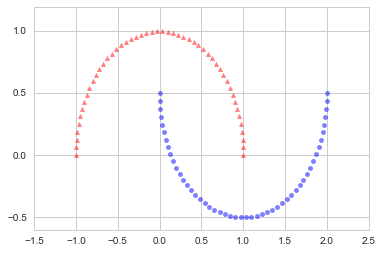

In [6]:
plt.scatter(X[Y==0,0],X[Y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X[Y==1,0],X[Y==1,1],color='blue',marker='o',alpha=0.5)

In [7]:
from sklearn.decomposition import PCA

(-1, 1)

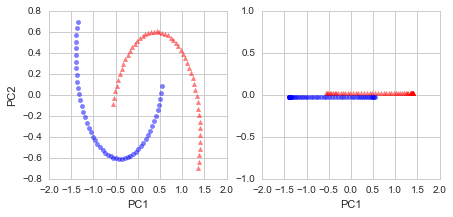

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_pca[Y==0,0],X_pca[Y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_pca[Y==1,0],X_pca[Y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_pca[Y==0,0],np.zeros((50,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X_pca[Y==1,0],np.zeros((50,1))-0.02,color='blue',marker='o',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylim(-1,1)


(-1, 1)

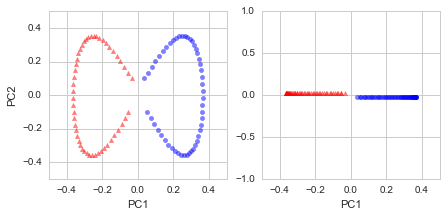

In [9]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2,kernel='rbf',gamma=15)

X_kpca = kpca.fit_transform(X)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_kpca[Y==0,0],X_kpca[Y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_kpca[Y==1,0],X_kpca[Y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_kpca[Y==0,0],np.zeros((50,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X_kpca[Y==1,0],np.zeros((50,1))-0.02,color='blue',marker='o',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylim(-1,1)

In [10]:
from sklearn.datasets import make_circles

In [11]:
X,Y = make_circles(n_samples=1000,random_state=123,noise=0.1,factor=0.2)

(-1, 1)

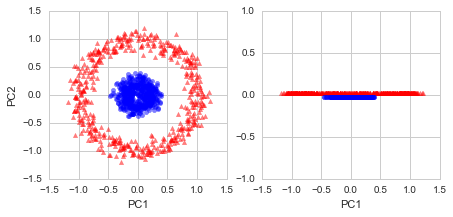

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_pca[Y==0,0],X_pca[Y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_pca[Y==1,0],X_pca[Y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_pca[Y==0,0],np.zeros((500,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X_pca[Y==1,0],np.zeros((500,1))-0.02,color='blue',marker='o',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylim(-1,1)

(-1, 1)

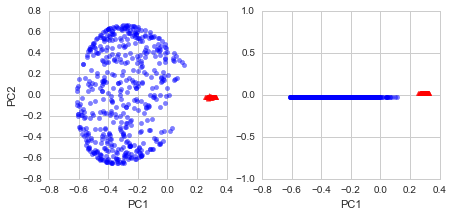

In [13]:
kpca = KernelPCA(n_components=2,kernel='rbf',gamma=15)

X_kpca = kpca.fit_transform(X)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_kpca[Y==0,0],X_kpca[Y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_kpca[Y==1,0],X_kpca[Y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_kpca[Y==0,0],np.zeros((500,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X_kpca[Y==1,0],np.zeros((500,1))-0.02,color='blue',marker='o',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylim(-1,1)